In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

In [23]:
# Load the dataset
df = pd.read_csv("/kaggle/input/pima-indians-diabetes-database/diabetes.csv")

In [24]:
# Display the first few rows of the dataset
print(df.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


# TASK

### <b>Question 1:</b> <i>What is the distribution of diabetes status in the dataset? How many individuals are diagnosed with diabetes and how many are not?</i>

In [25]:
# Count the number of individuals diagnosed with diabetes (Outcome = 1) and without diabetes (Outcome = 0)
diabetes_count = df[df['Outcome'] == 1].shape[0]
non_diabetes_count = df[df['Outcome'] == 0].shape[0]

# Calculate the percentages
diabetes_percentage = (diabetes_count / df.shape[0]) * 100
non_diabetes_percentage = (non_diabetes_count / df.shape[0]) * 100

# Print the results
print(f"Diagnosed with diabetes: {diabetes_count} individuals ({diabetes_percentage:.2f}%)")
print(f"Not diagnosed with diabetes: {non_diabetes_count} individuals ({non_diabetes_percentage:.2f}%)")

Diagnosed with diabetes: 268 individuals (34.90%)
Not diagnosed with diabetes: 500 individuals (65.10%)


<hr>

### <b>Question 2: </b> <i> Is there any relationship between glucose levels and the presence of diabetes? Can you compare the mean glucose levels for individuals with and without diabetes and determine if there is a significant difference using a hypothesis test?</i>

In [26]:
import pandas as pd
from scipy.stats import ttest_ind

# Select the glucose levels for individuals with and without diabetes
glucose_diabetes = df[df['Outcome'] == 1]['Glucose']
glucose_non_diabetes = df[df['Outcome'] == 0]['Glucose']

# Calculate the mean glucose levels for each group
mean_glucose_diabetes = glucose_diabetes.mean()
mean_glucose_non_diabetes = glucose_non_diabetes.mean()

# Perform a t-test to compare the means
t_statistic, p_value = ttest_ind(glucose_diabetes, glucose_non_diabetes)

# Print the results
print(f"Mean glucose levels for individuals with diabetes: {mean_glucose_diabetes:.2f}")
print(f"Mean glucose levels for individuals without diabetes: {mean_glucose_non_diabetes:.2f}")
print(f"T-statistic: {t_statistic:.2f}")
print(f"P-value: {p_value:.5f}")

Mean glucose levels for individuals with diabetes: 141.26
Mean glucose levels for individuals without diabetes: 109.98
T-statistic: 14.60
P-value: 0.00000


<hr>

### <b>Question 3: </b> <i>Analyze the distribution of skin thickness and blood pressure among individuals with and without diabetes. Are there any significant differences or patterns in skin thickness values and in the blood pressure values between the two groups?</i>

In [27]:
# Select skin thickness values for individuals with and without diabetes
skin_thickness_diabetes = df[df['Outcome'] == 1]['SkinThickness']
skin_thickness_non_diabetes = df[df['Outcome'] == 0]['SkinThickness']

# Compare the distributions using a t-test
t_statistic_skin_thickness, p_value_skin_thickness = ttest_ind(skin_thickness_diabetes, skin_thickness_non_diabetes)

# Select blood pressure values for individuals with and without diabetes
blood_pressure_diabetes = df[df['Outcome'] == 1]['BloodPressure']
blood_pressure_non_diabetes = df[df['Outcome'] == 0]['BloodPressure']

# Compare the distributions using a t-test
t_statistic_blood_pressure, p_value_blood_pressure = ttest_ind(blood_pressure_diabetes, blood_pressure_non_diabetes)

# Print the results
print("Skin Thickness:")
print(f"T-statistic: {t_statistic_skin_thickness:.2f}")
print(f"P-value: {p_value_skin_thickness:.5f}")
print()
print("Blood Pressure:")
print(f"T-statistic: {t_statistic_blood_pressure:.2f}")
print(f"P-value: {p_value_blood_pressure:.5f}")

Skin Thickness:
T-statistic: 2.07
P-value: 0.03835

Blood Pressure:
T-statistic: 1.80
P-value: 0.07151


<b>Note:</b> For skin thickness, the obtained t-statistic is 2.07, indicating a difference between individuals with and without diabetes. The p-value is 0.03835, which is below the typical significance level of 0.05. This suggests that there is a significant difference in skin thickness between individuals with and without diabetes. In other words, there is evidence to suggest that skin thickness may be associated with the presence of diabetes in the dataset. <br>

Regarding blood pressure, the obtained t-statistic is 1.80, suggesting a potential difference between the two groups. However, the p-value is 0.07151, which is slightly above the typical significance level of 0.05. Although the p-value is not below the significance level, it still indicates a relatively small probability of observing the observed difference in blood pressure between individuals with and without diabetes by chance alone. Thus, while the difference in blood pressure may not be considered statistically significant at the conventional level, it may still be worth investigating further or considering in combination with other factors or domain knowledge.

<hr>

### <b>Question 4: </b> <i>Can you visualize the distribution of body mass index (BMI) for individuals with and without diabetes using a suitable plot, such as a boxplot or histogram? Are there any noticeable differences in BMI between the two groups?</i>

#### BOXPLOT

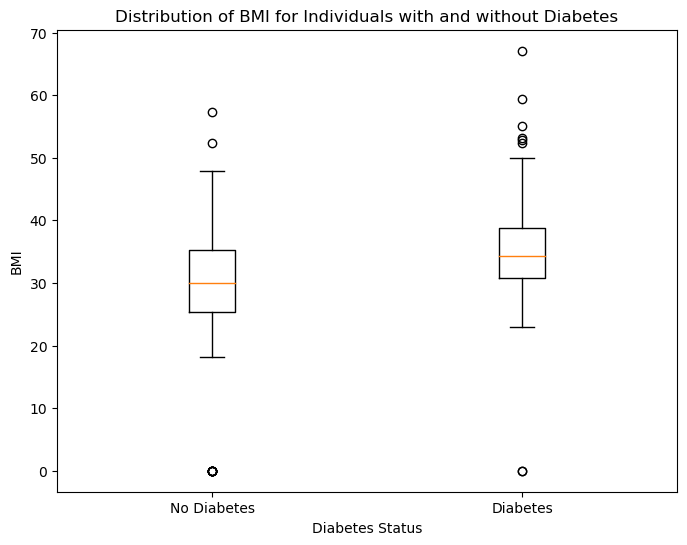

In [28]:
# BOXPLOT
import matplotlib.pyplot as plt

# Select BMI values for individuals with and without diabetes
bmi_diabetes = df[df['Outcome'] == 1]['BMI']
bmi_non_diabetes = df[df['Outcome'] == 0]['BMI']

# Create a boxplot
plt.figure(figsize=(8, 6))
plt.boxplot([bmi_non_diabetes, bmi_diabetes], labels=["No Diabetes", "Diabetes"])
plt.title("Distribution of BMI for Individuals with and without Diabetes")
plt.xlabel("Diabetes Status")
plt.ylabel("BMI")
plt.show()

In [29]:
# 2nd part of the task using boxplot
# Calculate statistics
median_nd = bmi_non_diabetes.median()
median_d = bmi_diabetes.median()
q1_nd, q3_nd = bmi_non_diabetes.quantile([0.25, 0.75])
q1_d, q3_d = bmi_diabetes.quantile([0.25, 0.75])
iqr_nd = q3_nd - q1_nd
iqr_d = q3_d - q1_d
outliers_nd = bmi_non_diabetes[bmi_non_diabetes > q3_nd + 1.5 * iqr_nd]
outliers_d = bmi_diabetes[bmi_diabetes > q3_d + 1.5 * iqr_d]

# Print numerical statistics
print("-----------BMI Statistics(BOXPLOT):-----------")
print("No Diabetes:")
print("  Median:", median_nd)
print("  25th Percentile (Q1):", q1_nd)
print("  75th Percentile (Q3):", q3_nd)
print("  Interquartile Range (IQR):", iqr_nd)
print("  Number of Outliers:", len(outliers_nd))
print()
print("Diabetes:")
print("  Median:", median_d)
print("  25th Percentile (Q1):", q1_d)
print("  75th Percentile (Q3):", q3_d)
print("  Interquartile Range (IQR):", iqr_d)
print("  Number of Outliers:", len(outliers_d))

# Analytical observations
print()
print("Analytical Observations:")
print("The median BMI for individuals with diabetes is higher than for those without diabetes, indicating a potential difference in BMI between the two groups.")
print("The interquartile range (IQR) for individuals with diabetes is smaller than for those without diabetes, suggesting that the spread of BMI values is narrower for the diabetes group.")
print("Outliers are present in the no diabetes group, indicating the presence of extreme BMI values that are significantly higher than the upper whisker.")

-----------BMI Statistics(BOXPLOT):-----------
No Diabetes:
  Median: 30.05
  25th Percentile (Q1): 25.4
  75th Percentile (Q3): 35.3
  Interquartile Range (IQR): 9.899999999999999
  Number of Outliers: 2

Diabetes:
  Median: 34.25
  25th Percentile (Q1): 30.8
  75th Percentile (Q3): 38.775000000000006
  Interquartile Range (IQR): 7.975000000000005
  Number of Outliers: 6

Analytical Observations:
The median BMI for individuals with diabetes is higher than for those without diabetes, indicating a potential difference in BMI between the two groups.
The interquartile range (IQR) for individuals with diabetes is smaller than for those without diabetes, suggesting that the spread of BMI values is narrower for the diabetes group.
Outliers are present in the no diabetes group, indicating the presence of extreme BMI values that are significantly higher than the upper whisker.


#### HISTOGRAM

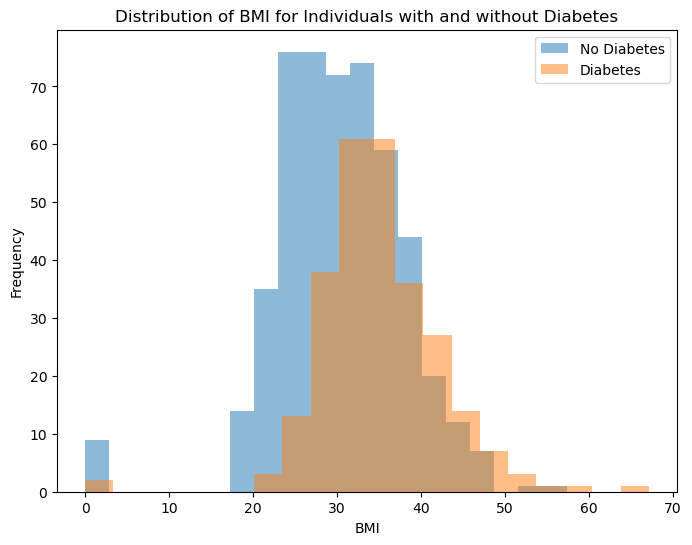

In [30]:
# HISTOGRAM
import matplotlib.pyplot as plt

# Select BMI values for individuals with and without diabetes
bmi_diabetes = df[df['Outcome'] == 1]['BMI']
bmi_non_diabetes = df[df['Outcome'] == 0]['BMI']

# Create histograms
plt.figure(figsize=(8, 6))
plt.hist(bmi_non_diabetes, bins=20, alpha=0.5, label='No Diabetes')
plt.hist(bmi_diabetes, bins=20, alpha=0.5, label='Diabetes')
plt.title("Distribution of BMI for Individuals with and without Diabetes")
plt.xlabel("BMI")
plt.ylabel("Frequency")
plt.legend()
plt.show()

In [31]:
# 2nd part of the task using histogram
# Calculate statistics
mean_nd = bmi_non_diabetes.mean()
mean_d = bmi_diabetes.mean()
median_nd = bmi_non_diabetes.median()
median_d = bmi_diabetes.median()
std_nd = bmi_non_diabetes.std()
std_d = bmi_diabetes.std()

# Print numerical statistics
print("-----------BMI Statistics(HISTOGRAM):-----------")
print("No Diabetes:")
print("  Mean:", mean_nd)
print("  Median:", median_nd)
print("  Standard Deviation:", std_nd)
print()
print("Diabetes:")
print("  Mean:", mean_d)
print("  Median:", median_d)
print("  Standard Deviation:", std_d)

# Analytical observations
print()
print("Analytical Observations:")
print("The distribution of BMI for individuals with and without diabetes appears to have some overlap, but individuals with diabetes tend to have higher BMIs on average.")
print("The mean and median BMI values are higher for individuals with diabetes compared to those without diabetes.")
print("The standard deviation of BMI values for individuals with diabetes is lower than for those without diabetes, suggesting a narrower spread of BMI values in the diabetes group.")

-----------BMI Statistics(HISTOGRAM):-----------
No Diabetes:
  Mean: 30.3042
  Median: 30.05
  Standard Deviation: 7.689855011650116

Diabetes:
  Mean: 35.14253731343284
  Median: 34.25
  Standard Deviation: 7.262967242346375

Analytical Observations:
The distribution of BMI for individuals with and without diabetes appears to have some overlap, but individuals with diabetes tend to have higher BMIs on average.
The mean and median BMI values are higher for individuals with diabetes compared to those without diabetes.
The standard deviation of BMI values for individuals with diabetes is lower than for those without diabetes, suggesting a narrower spread of BMI values in the diabetes group.


<hr>

### <b>Question 5: </b> <i>What is the average age of individuals with diabetes compared to those without diabetes? Can you calculate and compare the mean ages for the two groups and analyze if there is a significant difference?</i>


#### FIRST PART

In [32]:
# Calculate the average age for individuals with and without diabetes
avg_age_diabetes = df[df['Outcome'] == 1]['Age'].mean()
avg_age_non_diabetes = df[df['Outcome'] == 0]['Age'].mean()

# Print the average age
print("-----------Average Age:-----------")
print("Diabetes:", avg_age_diabetes)
print("No Diabetes:", avg_age_non_diabetes)

-----------Average Age:-----------
Diabetes: 37.06716417910448
No Diabetes: 31.19


#### SECOND PART

In [33]:
import scipy.stats as stats

# Select age values for individuals with and without diabetes
age_diabetes = df[df['Outcome'] == 1]['Age']
age_non_diabetes = df[df['Outcome'] == 0]['Age']

# Calculate the mean ages
mean_age_diabetes = age_diabetes.mean()
mean_age_non_diabetes = age_non_diabetes.mean()

# Perform independent t-test
t_stat, p_value = stats.ttest_ind(age_diabetes, age_non_diabetes)

# Print the mean ages and t-test results
print("Mean Ages:")
print("Diabetes:", mean_age_diabetes)
print("No Diabetes:", mean_age_non_diabetes)
print()
print("Independent t-test:")
print("T-statistic:", t_stat)
print("P-value:", p_value)

# Analyze the results
if p_value < 0.05:
    print("There is a significant difference in the mean ages between individuals with and without diabetes.")
else:
    print("There is no significant difference in the mean ages between individuals with and without diabetes.")

Mean Ages:
Diabetes: 37.06716417910448
No Diabetes: 31.19

Independent t-test:
T-statistic: 6.792688071649956
P-value: 2.2099754606654358e-11
There is a significant difference in the mean ages between individuals with and without diabetes.
